In [4]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_titanic_data
from prepare import prep_titanic
df = get_titanic_data()

scaler, ohe, train, test = prep_titanic(df)

train.info()

- CodeUp_db successfully accessed ...
- titanic_db SQL query successful ...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 683 to 399
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  668 non-null    int64  
 1   survived      668 non-null    int64  
 2   pclass        668 non-null    int64  
 3   sex           668 non-null    object 
 4   age           668 non-null    float64
 5   sibsp         668 non-null    int64  
 6   parch         668 non-null    int64  
 7   fare          668 non-null    float64
 8   embarked      668 non-null    object 
 9   class         668 non-null    object 
 10  embark_town   668 non-null    object 
 11  alone         668 non-null    int64  
 12  C             668 non-null    float64
 13  Q             668 non-null    float64
 14  S             668 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 103.5+ KB


In [5]:
X_train = train[['pclass','age','fare','sibsp','parch']]
y_train = train[['survived']]
X_test = test[['pclass','age','fare','sibsp','parch']]
y_test = test[['survived']]

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 683 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  668 non-null    int64  
 1   age     668 non-null    float64
 2   fare    668 non-null    float64
 3   sibsp   668 non-null    int64  
 4   parch   668 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 51.3 KB


In [9]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred = knn.predict(X_train)

In [12]:
y_pred_proba = knn.predict_proba(X_train)

In [13]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [14]:
print(confusion_matrix(y_train, y_pred))

[[345  67]
 [ 76 180]]


In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       412
           1       0.73      0.70      0.72       256

    accuracy                           0.79       668
   macro avg       0.77      0.77      0.77       668
weighted avg       0.78      0.79      0.79       668



In [16]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.68


([<matplotlib.axis.XTick at 0x1a19defdd0>,
 <a list of 5 Text xticklabel objects>)

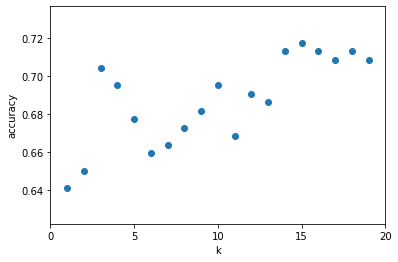

In [17]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])